<a href="https://colab.research.google.com/github/snehapandey2000/Intrusion-Detection-System/blob/main/MutilClassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df= pd.read_csv("/content/drive/MyDrive/DRDO Internship/Code/Datasets/processed.csv")

In [ ]:
df.head()

,protocol,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,fwd_pkt_len_max,fwd_pkt_len_std,bwd_pkt_len_mean,bwd_pkt_len_std,flow_byts_s,...,init_bwd_win_byts,fwd_seg_size_min,active_mean,idle_mean,label,label_code,label_is_attack,label_is_attack_dos_attacks_hulk,label_is_attack_bot,label_is_attack_dos_attacks_slowhttptest
0,0,112640768,3,0,0,0,0.000000,0.000000,0.0000,0.000000,...,-1,0,0.0,56300000.0,Benign,0,0,0,0,0
1,0,112641773,3,0,0,0,0.000000,0.000000,0.0000,0.000000,...,-1,0,0.0,56300000.0,Benign,0,0,0,0,0
2,6,20784143,23,44,2416,240,54.542294,30.545454,32.3365,180.907146,...,255,20,2624734.0,9058214.0,Benign,0,0,0,0,0
3,0,112640836,3,0,0,0,0.000000,0.000000,0.0000,0.000000,...,-1,0,0.0,56300000.0,Benign,0,0,0,0,0
4,6,20,1,1,0,0,0.000000,0.000000,0.0000,0.000000,...,0,20,0.0,0.0,Benign,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094591 entries, 0 to 2094590
Data columns (total 34 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   protocol                                  int64  
 1   flow_duration                             int64  
 2   tot_fwd_pkts                              int64  
 3   tot_bwd_pkts                              int64  
 4   totlen_fwd_pkts                           int64  
 5   fwd_pkt_len_max                           int64  
 6   fwd_pkt_len_std                           float64
 7   bwd_pkt_len_mean                          float64
 8   bwd_pkt_len_std                           float64
 9   flow_byts_s                               float64
 10  flow_pkts_s                               float64
 11  flow_iat_std                              float64
 12  flow_iat_min                              int64  
 13  fwd_iat_tot                               int64  
 14  fw

Replacing infinity value with mean vale of column

In [ ]:
import numpy as np
inf_columns = [c for c in df.columns if df[df[c] == np.inf][c].count() > 0]
for col in inf_columns:
    df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)

In [ ]:
pd.value_counts(df.label_code)

0    1206598
2     461912
1     286191
3     139890
Name: label_code, dtype: int64

In [ ]:
df['label'] = df.label.astype('category')
labels = df['label'].cat.categories
label_codes = df['label_code'].values

mapping = {code: label for code, label in zip(range(len(labels)), labels)}
print(mapping)

{0: 'Benign', 1: 'Bot', 2: 'DoS attacks-Hulk', 3: 'DoS attacks-SlowHTTPTest'}


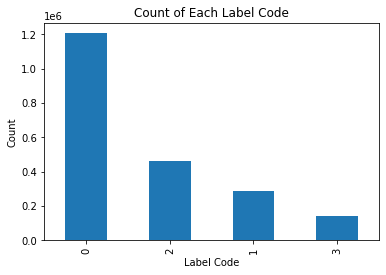

In [ ]:
import matplotlib.pyplot as plt
label_counts = df['label_code'].value_counts()
label_counts.plot(kind='bar', x='label_code', y='count')
plt.xlabel('Label Code')
plt.ylabel('Count')
plt.title('Count of Each Label Code')
plt.show()

In [ ]:
X = df.drop(columns=['label', 'label_code', 'label_is_attack', 'label_is_attack_dos_attacks_hulk','label_is_attack_bot','label_is_attack_dos_attacks_slowhttptest'])
y = df[['label_code']]

Splitting training and testing dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y.label_code)

X_train_oh = pd.get_dummies(X_train, columns=['protocol'])
X_test_oh = pd.get_dummies(X_test, columns=['protocol'])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_oh)

StandardScaler()

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Classification Report

In [ ]:
import scikitplot as skplt
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, precision_recall_curve, average_precision_score
def print_report(ds_type, cls, X_vals, y_true, y_predict, plot_pr=False, plot_roc=False):
    print(f"Classification Report ({ds_type}):")
    print(classification_report(y_true, y_predict))
    print('\n')

**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
cls_forest = RandomForestClassifier(verbose=1, n_jobs=-1, class_weight='balanced')
cls_forest.fit(X_train_oh, y_train.label_code)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.0min finished


RandomForestClassifier(class_weight='balanced', n_jobs=-1, verbose=1)

In [ ]:
print_report('Train', cls_forest, X_train_oh, y_train.label_code, cls_forest.predict(X_train_oh))
print_report('Eval', cls_forest, X_test_oh, y_test.label_code, cls_forest.predict(X_test_oh), plot_pr=True)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   10.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   27.7s finished


Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    965278
           1       1.00      1.00      1.00    228953
           2       1.00      1.00      1.00    369529
           3       1.00      1.00      1.00    111912

    accuracy                           1.00   1675672
   macro avg       1.00      1.00      1.00   1675672
weighted avg       1.00      1.00      1.00   1675672





[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    4.7s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    9.4s finished


Classification Report (Eval):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    241320
           1       1.00      1.00      1.00     57238
           2       1.00      1.00      1.00     92383
           3       1.00      1.00      1.00     27978

    accuracy                           1.00    418919
   macro avg       1.00      1.00      1.00    418919
weighted avg       1.00      1.00      1.00    418919





In [ ]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

In [ ]:
predictions_rf= cls_forest.predict(X_test_oh)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    4.1s finished


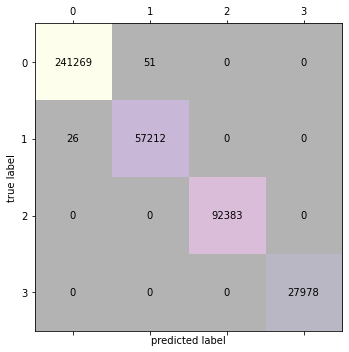

In [ ]:
conf_mat_rf = confusion_matrix(y_test, predictions_rf)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_mat_rf, cmap=plt.cm.magma, alpha=0.3)
for i in range(conf_mat_rf.shape[0]):
    for j in range(conf_mat_rf.shape[1]):
        ax.text(x=j, y=i, s=conf_mat_rf[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.tight_layout()
plt.show()

Claculating Misclassifications

In [ ]:
def calculate_misclassifiations(y, predictions):
    classifications = y.copy()
    classifications['pred'] = predictions
    counts = classifications.label_code.value_counts()
    
    misclassifications = classifications[classifications.label_code != classifications.pred]
    mc = pd.DataFrame(misclassifications.label_code.value_counts())
    mc['percentage'] = mc.apply(lambda x: x[0] / counts[x.name], axis=1)
    mc = mc.sort_values('percentage', ascending=False)
    
    print('Misclassifications:')
    display(mc)

In [ ]:
calculate_misclassifiations(y_test, predictions_rf) 

Misclassifications:


,label_code,percentage
1,26,0.000454
0,51,0.000211


In [ ]:
! pip install eli5
import eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 13.9 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=3e5edfce49672cd46d71312473d31e2a8c3cd1995749ad0e97b61df025585ae9
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatib

In [ ]:
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(cls_forest, scoring='recall_weighted', n_iter=3).fit(X_test_oh, y_test.label_code)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    2.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    4.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    3.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    3.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    6.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    2.7s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    5.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    4.7s
[Parallel(n_job

In [ ]:
eli5.show_weights(perm, feature_names=X_test_oh.columns.tolist())

Weight,Feature
0.2558 ± 0.0005,init_fwd_win_byts
0.1434 ± 0.0005,fwd_seg_size_min
0.0249 ± 0.0004,fwd_iat_min
0.0234 ± 0.0002,flow_iat_std
0.0009 ± 0.0000,rst_flag_cnt
0.0001 ± 0.0000,idle_mean
0.0001 ± 0.0000,fwd_iat_tot
0.0000 ± 0.0000,tot_fwd_pkts
0.0000 ± 0.0000,bwd_pkt_len_std
0.0000 ± 0.0000,totlen_fwd_pkts


Removing the top important features from the dataset and then again training the model to observe the changes.

In [ ]:
X_train_modified=X_train_oh.drop(columns=["init_fwd_win_byts","fwd_seg_size_min"])

In [ ]:
cls_forest_modified = RandomForestClassifier(verbose=1, n_jobs=-1, class_weight='balanced')
cls_forest_modified.fit(X_train_modified, y_train.label_code)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  8.2min finished


RandomForestClassifier(class_weight='balanced', n_jobs=-1, verbose=1)

In [ ]:
X_test_modified=X_test_oh.drop(columns=["init_fwd_win_byts","fwd_seg_size_min"])
predictions_rf_modified= cls_forest_modified.predict(X_test_modified)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    3.9s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    9.6s finished


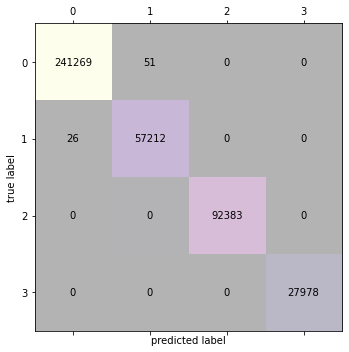

In [ ]:
conf_mat_rf_modified = confusion_matrix(y_test, predictions_rf_modified)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_mat_rf_modified, cmap=plt.cm.magma, alpha=0.3)
for i in range(conf_mat_rf_modified.shape[0]):
    for j in range(conf_mat_rf_modified.shape[1]):
        ax.text(x=j, y=i, s=conf_mat_rf[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.tight_layout()
plt.show()

In [ ]:
print_report('Train', cls_forest_modified, X_train_modified, y_train.label_code, cls_forest_modified.predict(X_train_modified))
print_report('Eval', cls_forest_modified, X_test_modified, y_test.label_code, cls_forest_modified.predict(X_test_modified), plot_pr=True)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   13.2s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   27.8s finished


Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    965278
           1       0.93      0.99      0.96    228953
           2       0.96      0.94      0.95    369529
           3       1.00      1.00      1.00    111912

    accuracy                           0.98   1675672
   macro avg       0.97      0.98      0.98   1675672
weighted avg       0.98      0.98      0.98   1675672





[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    2.7s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    5.9s finished


Classification Report (Eval):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    241320
           1       0.93      0.99      0.96     57238
           2       0.96      0.94      0.95     92383
           3       1.00      1.00      1.00     27978

    accuracy                           0.98    418919
   macro avg       0.97      0.98      0.98    418919
weighted avg       0.98      0.98      0.98    418919





In [ ]:
from eli5.sklearn import PermutationImportance
perm_modified = PermutationImportance(cls_forest_modified, scoring='recall_weighted', n_iter=3).fit(X_test_modified, y_test.label_code)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    4.8s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    9.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    2.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    5.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    2.7s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    6.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    2.7s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    5.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    2.2s
[Parallel(n_job

New set of important features observed.

In [ ]:
eli5.show_weights(perm_modified, feature_names=X_test_modified.columns.tolist())

Weight,Feature
0.0741 ± 0.0002,ack_flag_cnt
0.0590 ± 0.0002,rst_flag_cnt
0.0481 ± 0.0006,psh_flag_cnt
0.0137 ± 0.0002,flow_pkts_s
0.0076 ± 0.0000,flow_iat_min
0.0056 ± 0.0001,bwd_pkt_len_std
0.0051 ± 0.0001,fwd_iat_min
0.0046 ± 0.0001,bwd_pkt_len_mean
0.0013 ± 0.0000,urg_flag_cnt
0.0003 ± 0.0001,bwd_pkts_s


Calculating range of important features.

In [ ]:
features_to_analyze=['init_fwd_win_byts','fwd_seg_size_min','fwd_iat_min']
X=X_test_oh
X['predicted_class']=predictions_rf
grouped = X.groupby("predicted_class")
range_values = {}
for name, group in grouped:
    range_values[name] = {}
    for feature in features_to_analyze:
      range_values[name][feature] = (group[feature].min(), group[feature].max())

# Store the results in a new data structure for later analysis
print(range_values)


{0: {'init_fwd_win_byts': (-1, 65535), 'fwd_seg_size_min': (0, 44), 'fwd_iat_min': (0, 120000000)}, 1: {'init_fwd_win_byts': (-1, 8192), 'fwd_seg_size_min': (0, 28), 'fwd_iat_min': (0, 514030)}, 2: {'init_fwd_win_byts': (0, 26883), 'fwd_seg_size_min': (20, 32), 'fwd_iat_min': (2, 198618)}, 3: {'init_fwd_win_byts': (26883, 26883), 'fwd_seg_size_min': (40, 40), 'fwd_iat_min': (0, 0)}}


**NAIVE  BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB
cls_nb = GaussianNB()
cls_nb.fit(X_train_oh, y_train.label_code)

GaussianNB()

In [ ]:
X_test_oh = X.drop("predicted_class", axis=1)

In [ ]:
print_report('Train', cls_nb, X_train_oh, y_train.label_code, cls_nb.predict(X_train_oh))
print_report('Eval', cls_nb, X_test_oh, y_test.label_code, cls_nb.predict(X_test_oh), plot_pr=True)

Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      0.41      0.58    965278
           1       0.50      1.00      0.66    228953
           2       0.35      0.67      0.46    369529
           3       1.00      1.00      1.00    111912

    accuracy                           0.59   1675672
   macro avg       0.71      0.77      0.68   1675672
weighted avg       0.79      0.59      0.59   1675672



Classification Report (Eval):
              precision    recall  f1-score   support

           0       1.00      0.41      0.58    241320
           1       0.50      1.00      0.66     57238
           2       0.35      0.67      0.46     92383
           3       1.00      1.00      1.00     27978

    accuracy                           0.59    418919
   macro avg       0.71      0.77      0.68    418919
weighted avg       0.79      0.59      0.59    418919





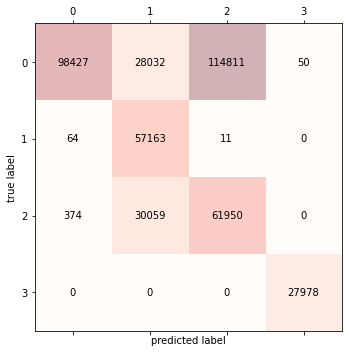

In [ ]:
predictions_nb= cls_nb.predict(X_test_oh)
conf_mat_nb = confusion_matrix(y_test, predictions_nb)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_mat_nb, cmap=plt.cm.Reds, alpha=0.3)
for i in range(conf_mat_nb.shape[0]):
    for j in range(conf_mat_nb.shape[1]):
        ax.text(x=j, y=i, s=conf_mat_nb[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.tight_layout()
plt.show()

In [ ]:
perm_nb = PermutationImportance(cls_nb, scoring='recall_weighted', n_iter=3).fit(X_test_oh, y_test.label_code)

In [ ]:
eli5.show_weights(perm_nb, feature_names=X_test_oh.columns.tolist())

Weight,Feature
0.0805 ± 0.0002,init_bwd_win_byts
0.0697 ± 0.0002,init_fwd_win_byts
0.0684 ± 0.0000,flow_iat_min
0.0494 ± 0.0001,flow_byts_s
0.0426 ± 0.0002,flow_iat_std
0.0340 ± 0.0008,flow_duration
0.0314 ± 0.0003,fwd_iat_tot
0.0144 ± 0.0006,fwd_iat_min
0.0058 ± 0.0002,idle_mean
0.0044 ± 0.0006,flow_pkts_s


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train_oh, y_train.label_code)

DecisionTreeClassifier()

In [ ]:
print_report('Train', dt, X_train_oh, y_train.label_code, dt.predict(X_train_oh))
print_report('Eval', dt, X_test_oh, y_test.label_code, dt.predict(X_test_oh), plot_pr=True)

Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    965278
           1       1.00      1.00      1.00    228953
           2       1.00      1.00      1.00    369529
           3       1.00      1.00      1.00    111912

    accuracy                           1.00   1675672
   macro avg       1.00      1.00      1.00   1675672
weighted avg       1.00      1.00      1.00   1675672



Classification Report (Eval):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    241320
           1       1.00      1.00      1.00     57238
           2       1.00      1.00      1.00     92383
           3       1.00      1.00      1.00     27978

    accuracy                           1.00    418919
   macro avg       1.00      1.00      1.00    418919
weighted avg       1.00      1.00      1.00    418919





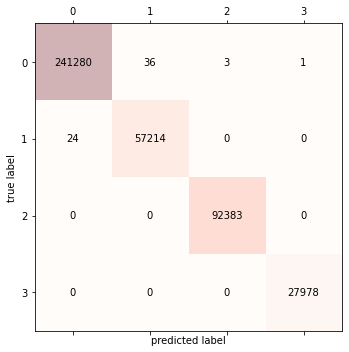

In [ ]:
predictions_nb= dt.predict(X_test_oh)
conf_mat_nb = confusion_matrix(y_test, predictions_nb)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_mat_nb, cmap=plt.cm.Reds, alpha=0.3)
for i in range(conf_mat_nb.shape[0]):
    for j in range(conf_mat_nb.shape[1]):
        ax.text(x=j, y=i, s=conf_mat_nb[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.tight_layout()
plt.show()

In [ ]:
perm = PermutationImportance(dt, scoring='recall_weighted', n_iter=3).fit(X_test_oh, y_test.label_code)

In [ ]:
eli5.show_weights(perm, feature_names=X_test_oh.columns.tolist())

Weight,Feature
0.3281 ± 0.0007,init_fwd_win_byts
0.2045 ± 0.0009,fwd_seg_size_min
0.1679 ± 0.0007,bwd_pkt_len_mean
0.0703 ± 0.0002,bwd_pkts_s
0.0532 ± 0.0006,bwd_pkt_len_std
0.0476 ± 0.0002,tot_fwd_pkts
0.0467 ± 0.0003,psh_flag_cnt
0.0467 ± 0.0003,fwd_iat_min
0.0353 ± 0.0002,tot_bwd_pkts
0.0307 ± 0.0001,fwd_iat_tot
